# Diabetes Prediction using Decision Tree and Bagging Classifier

This notebook demonstrates how to load, visualize, and model the PIMA Indians Diabetes dataset. We will compare the performance of a single **Decision Tree Classifier** against an ensemble method, the **Bagging Classifier**.

### 1. Import Libraries

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # For data handling and reading CSV files
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # The classifier model we'll use as a base
from sklearn.model_selection import cross_val_score  # For performing cross-validation to evaluate the model
from sklearn.ensemble import BaggingClassifier  # The ensemble method that uses multiple decision trees
from sklearn.metrics import accuracy_score  # To calculate the accuracy of the models

### 2. Load and Prepare the Data

In [2]:
# Load the dataset from a CSV file named 'diabetes.csv' into a pandas DataFrame
df = pd.read_csv('diabetes.csv')
# Display the first 5 rows of the DataFrame to get a quick look at the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Separate the dataset into features (independent variables) and the target (dependent variable)
# 'X' contains all columns except 'Outcome', which are our features
X = df.drop('Outcome', axis='columns')
# 'y' contains only the 'Outcome' column, which is what we want to predict (0 = no diabetes, 1 = diabetes)
y = df.Outcome

In [4]:
# Split the data into training and testing sets to evaluate model performance on unseen data
# 'random_state=10' ensures that the split is the same every time the code is run, for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### 3. Exploratory Data Analysis (EDA)

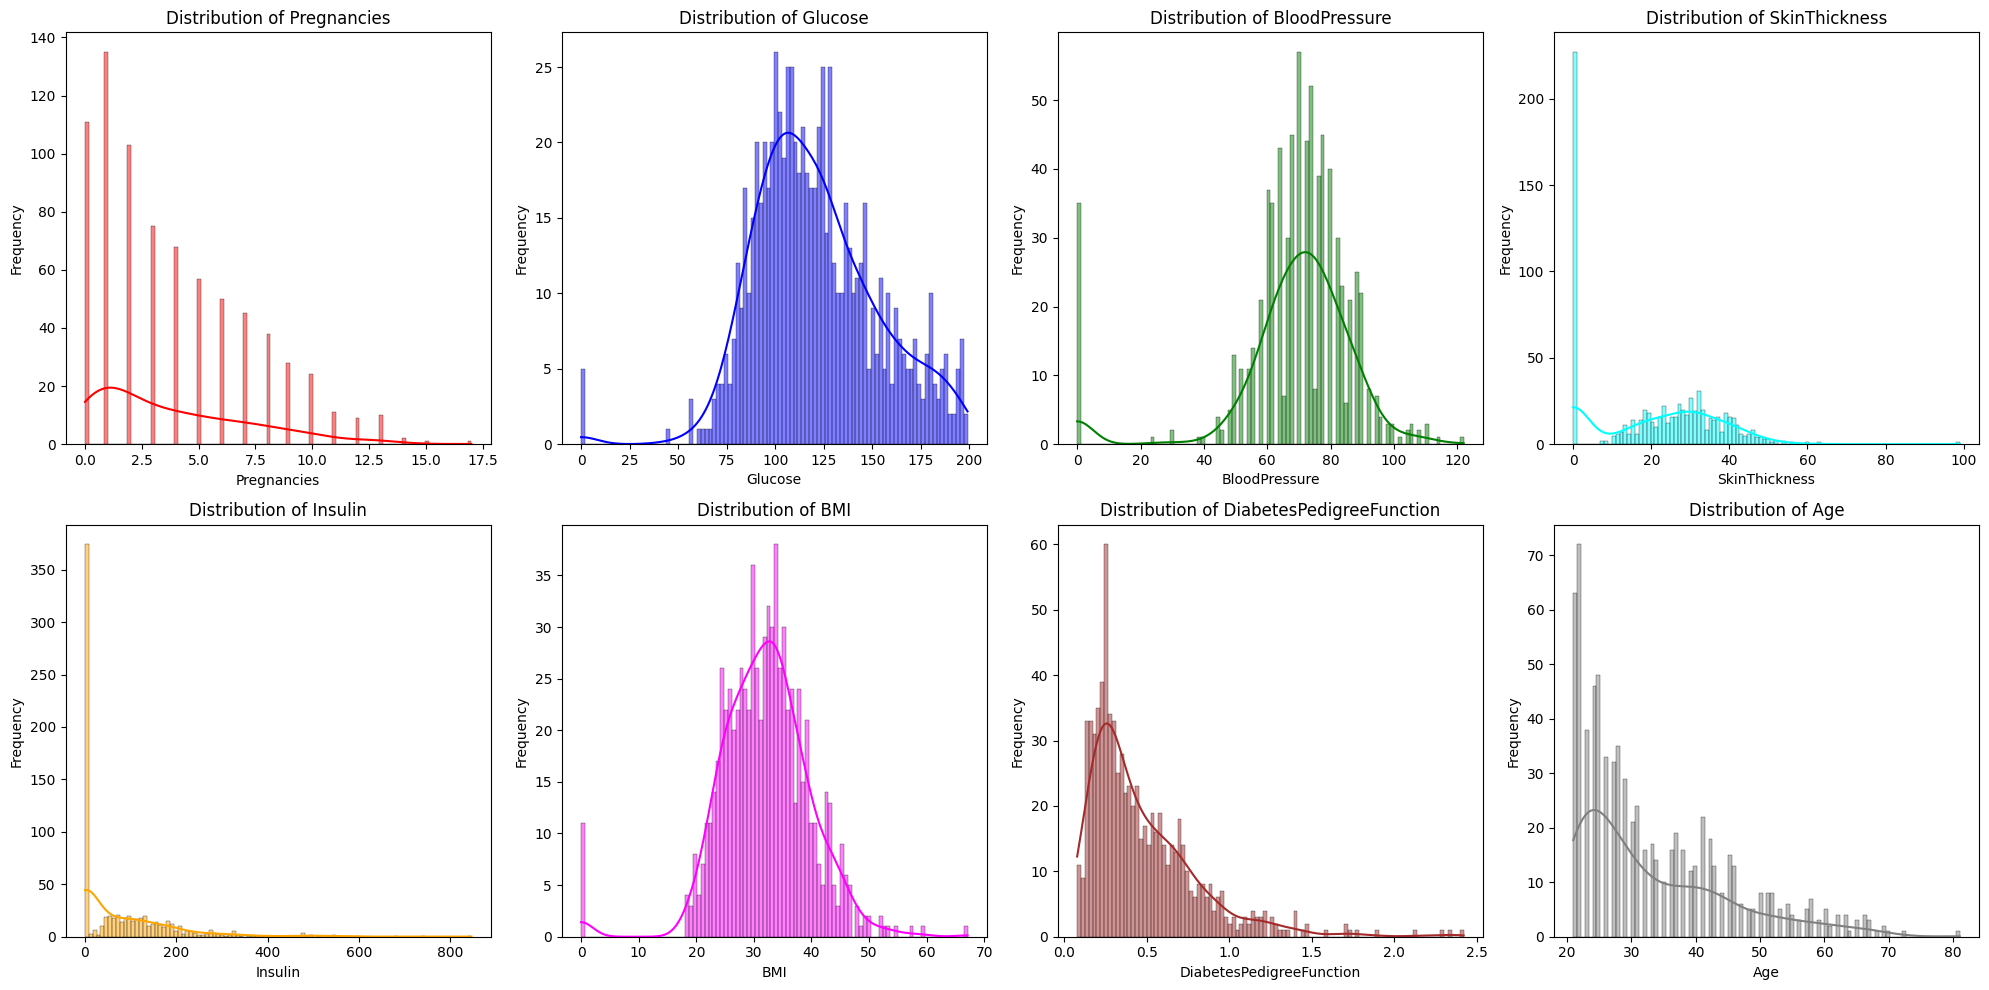

In [5]:
# Create a figure and a set of subplots (2 rows, 4 columns) to visualize each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# Define a list of colors for the plots
clr = ['red','blue','green','cyan','orange','magenta','brown','grey']

# Loop through each feature column in the DataFrame 'X' to create a distribution plot
for i, feature in enumerate(X.columns):
    # Determine the position of the subplot in the 2x4 grid
    ax = axes[i // 4, i % 4]
    # Plot a histogram with a Kernel Density Estimate (KDE) line for the current feature
    sns.histplot(X[feature], kde=True, ax=ax, color=clr[i], bins=100)
    # Set the title and labels for the subplot
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

C:\Users\Raman Tayal\AppData\Local\Temp\ipykernel_10024\1018813029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


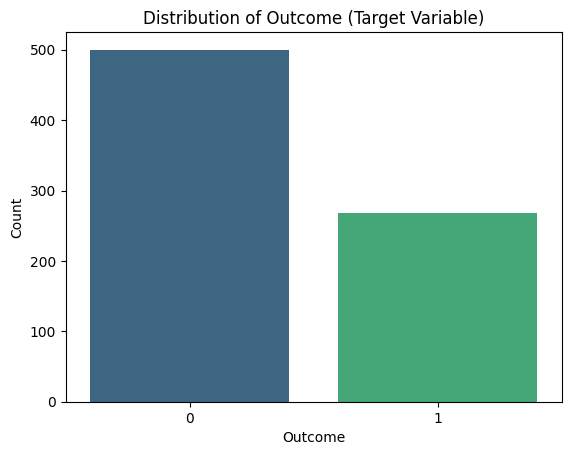

In [6]:
# Plot a bar chart (countplot) showing the number of instances for each outcome (0 and 1)
plt.figure()
sns.countplot(x=y, palette='viridis')
# Set the title and labels for the plot
plt.title('Distribution of Outcome (Target Variable)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### 4. Model Evaluation: Decision Tree with Cross-Validation

Before training our final models, let's use k-fold cross-validation on the entire dataset to get a robust estimate of how a simple Decision Tree performs.

In [7]:
# Perform 5-fold cross-validation on a Decision Tree Classifier
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print(f"Cross-validation scores for each fold: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores for each fold: [0.68181818 0.68181818 0.7012987  0.79738562 0.70588235]
Mean cross-validation score: 0.7136406077582548


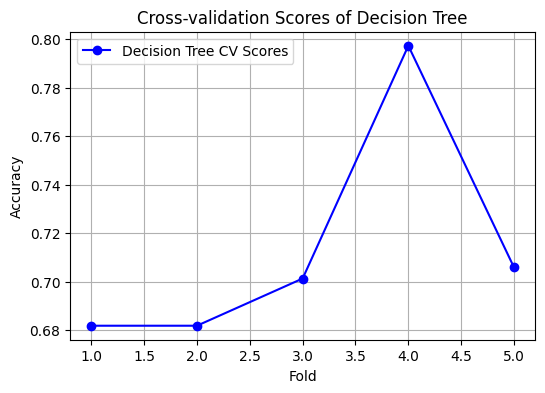

In [8]:
# Plot the accuracy scores from the cross-validation to visualize performance variance across folds
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), scores, marker='o', linestyle='-', color='b', label='Decision Tree CV Scores')
plt.title('Cross-validation Scores of Decision Tree')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### 5. Model Training: Bagging Classifier

Now, let's train the Bagging Classifier on our training set. We will use the Out-of-Bag (OOB) score as an initial performance estimate.

In [9]:
# Initialize and train the Bagging Classifier model
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
model.fit(X_train, y_train)
print(f"Out-of-Bag Score for Bagging: {model.oob_score_}")

Out-of-Bag Score for Bagging: 0.78125


### 6. Model Comparison on the Test Set

In [10]:
# For comparison, train a single Decision Tree model on the same training data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# Use both models to make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
y_pred_bagging = model.predict(X_test)

In [11]:
# Calculate the accuracy of both models
dt_accuracy = accuracy_score(y_test, y_pred_dt)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# Print the accuracies to see the numerical comparison
print(f"Single Decision Tree Accuracy on Test Set: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy on Test Set: {bagging_accuracy:.4f}")

Single Decision Tree Accuracy on Test Set: 0.7083
Bagging Classifier Accuracy on Test Set: 0.7552


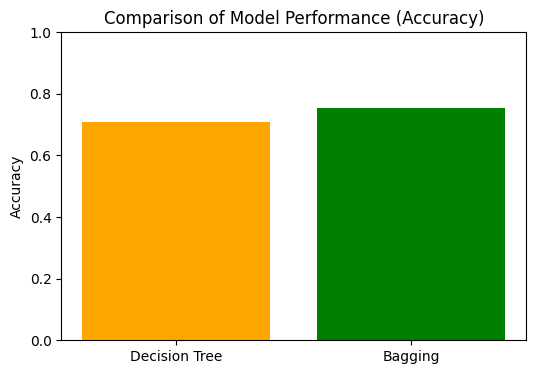

In [12]:
# Plot a bar chart to visually compare the accuracy of the two models
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Bagging'], [dt_accuracy, bagging_accuracy], color=['orange', 'green'])
plt.title('Comparison of Model Performance (Accuracy)')
plt.ylabel('Accuracy')
# Set the y-axis limit to be between 0 and 1 for a clear percentage view
plt.ylim(0, 1)
plt.show()